In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 14

In this lecture we will:
1. Simulate the Monty Hall Problem
2. Demonstrate Deterministic and Random Sampling
3. Probability Distributions and Empirical Distributions
4. Law of Large Numbers

## Addendum

In [2]:
p1 = 2*(1/100 * 1/99) + 2 * (1/100 * 98/99) + 2 * (98/100 * 1/99)

In [3]:
p2 = 1 - (98/100) * (97/99)

In [4]:
p1 == p2

False

In [5]:
p1, p2

(0.0397979797979798, 0.03979797979797983)

In [6]:
round(p1, 10) == round(p2, 10)

True

---

## The Monty Hall Problem 

Here we simulate the Monty Hall problem.  We break the process into three steps. 

1. Simulate the prize behind the door we picked (this is the only chance event):


In [7]:
prizes = make_array("goat", "goat", "car")

In [8]:
N = 10_000
outcomes = Table().with_column("My Choice", np.random.choice(prizes, N))
outcomes

My Choice
car
car
goat
car
car
car
goat
car
goat
goat


2. Then Monty Hall reveals a Goat behind one of the other doors.

In [9]:
outcomes = outcomes.with_column("Monty's Door", "goat")
outcomes

My Choice,Monty's Door
car,goat
car,goat
goat,goat
car,goat
car,goat
car,goat
goat,goat
car,goat
goat,goat
goat,goat


3. Finally we compute the prize behind the remaining door.  Since Monty revealed one of the goats, the prize behind the remaining door depends only on our initial choice.  If we picked a car, then the remaining door has a goat.  Otherwise it has a car.

In [10]:
def other_door(my_choice):
    if my_choice == "car":
        return "goat"
    else:
        return "car"

In [11]:
outcomes = outcomes.with_column("Other Door", outcomes.apply(other_door, "My Choice"))
outcomes

My Choice,Monty's Door,Other Door
car,goat,goat
car,goat,goat
goat,goat,car
car,goat,goat
car,goat,goat
car,goat,goat
goat,goat,car
car,goat,goat
goat,goat,car
goat,goat,car


Notice that in the above table each row has two goats and a car.  Each row simulates an outcome of playing the game.

If we stayed with our initial choice how often would we get a car?

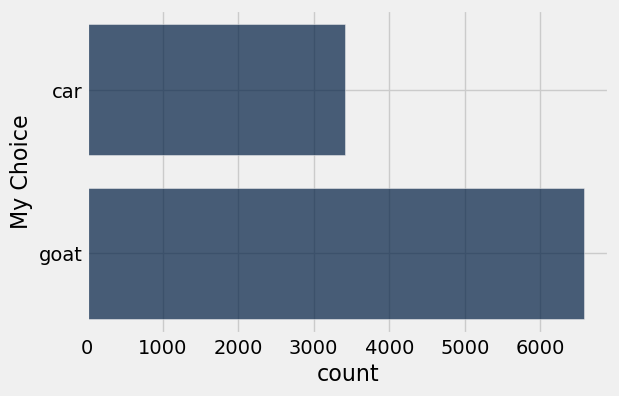

In [12]:
outcomes.group("My Choice").barh("My Choice")

If we switched to the Other door how often would we win?

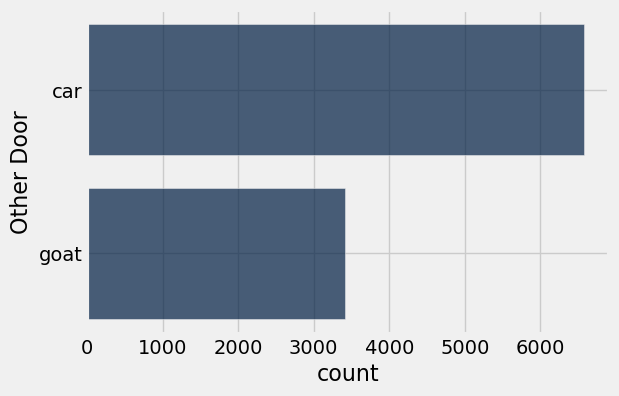

In [13]:
outcomes.group("Other Door").barh("Other Door")

Would you switch?

---
<center> Return to Slides </center>

---

## Random Sampling ##

Here we will use a dataset of all United airlines flights from 6/1/15 to 8/9/15.  This data contains their destination and how long they were delayed, in minutes.

In [14]:
united = Table.read_table('data/united.csv')
united = ( # Adding row numbers so we can see samples more easily
    united
    .with_column('Row', np.arange(united.num_rows))
    .move_to_start('Row') 
)
united

# question-- how late are united flights on average?
# Delay column is in minutes
# 0 minutes = on time!
# negative minutes = early!

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


For each of the following, is this a deterministic or random sampling strategy?

In [15]:
jfk = united.where('Destination', 'JFK')
np.average(jfk.column('Delay'))

# if our population is all united flights, in the summer 2015
# this average flight delay of 18 min is going to be specific to flights that landed in JFK
# think about JFK: it is an international airport, very large, popular destination

18.452736318407961

<details><summary>Answer</summary>

**Deterministic**

</details>

In [16]:
small_sample = united.sample(3, with_replacement=True)
np.average(small_sample.column('Delay'))
# very small teeny tiny sample
# technicallly random, but not a great one since it is so small
small_sample

Row,Date,Flight Number,Destination,Delay
10680,8/10/15,1662,ORD,0
9962,8/6/15,237,STL,-5
7135,7/18/15,1614,LAS,143


<details><summary>Answer</summary>

**Random**

</details>

In [17]:
(
    united
    .where('Destination', 'JFK')
    .sample(3, with_replacement=True)
)
# we used random selection with .sample function
# but still i'd argue deterministic since we are looking at a subset of JFK flights

# now if our population was now flights into JFK
# this would be a random sample, although a very samll one

Row,Date,Flight Number,Destination,Delay
1712,6/12/15,760,JFK,-2
2455,6/17/15,758,JFK,-6
5858,7/10/15,637,JFK,0


<details><summary>Answer</summary>

**Random**

</details>

---
<center> Return to Slides </center>

---

## Distributions 

In [18]:
die = Table().with_column('Face', np.arange(1, 7)) # np.arange(1, 7) = (1, 2, 3, 4, 5, 6)
die

Face
1
2
3
4
5
6


What is the **Probability Distribution** of drawing each face assuming each face is equally likely (a "fair die")?

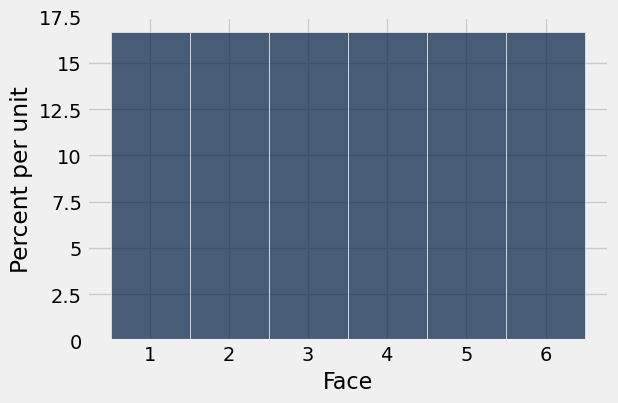

In [19]:
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins=roll_bins)

We can sample from the die table many times with replacement:

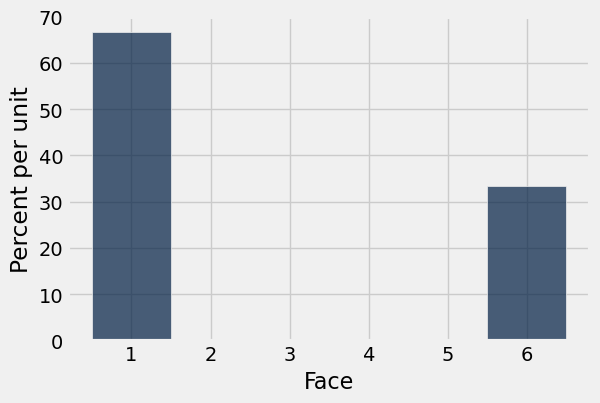

In [40]:
die.sample(3).hist(bins=roll_bins)
# simulate 3 tosses of my die
# demonstrates i got 1 twice and 6 once
# notice with a small sample size, we don't get a distribution that looks like probability distirubiton

We can construct an **Empirical Distribution** from our simulation:

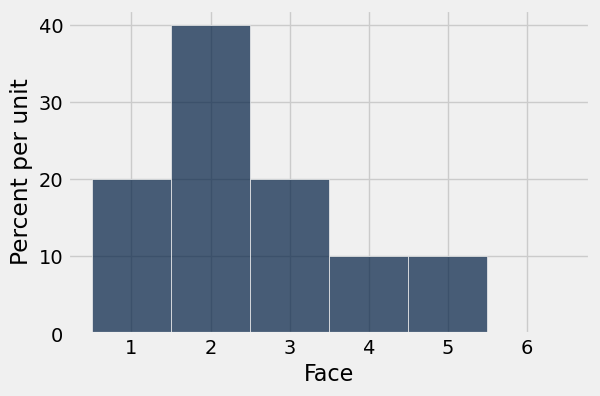

In [21]:
die.sample(10).hist(bins=roll_bins)
# simulated 10 die tosses

If we increase the number of trials in our simulation, what happens to the distribution?

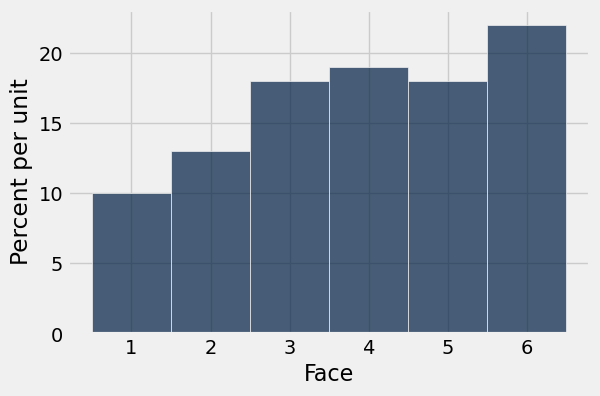

In [41]:
die.sample(100).hist(bins=roll_bins)

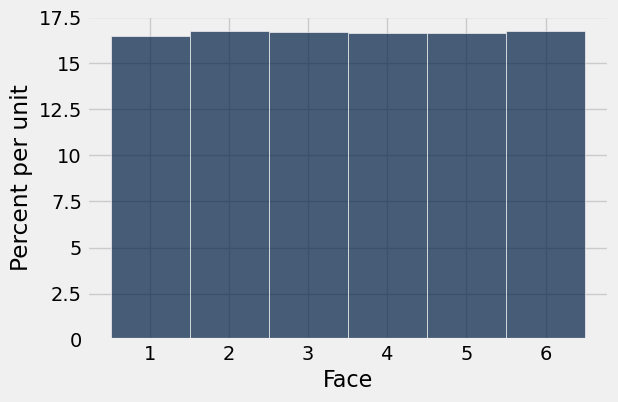

In [42]:
die.sample(100_000).hist(bins=roll_bins)
# this underlines the point, where it is important for our sample to be large and random
# when we have a large sample size, our empirical distribution which is a collection of our simulated values
# simulated die tosses
# looks much closer to the probability distribution


---
<center> Return to Slides </center>

---

## Large Random Samples 

The United flight delays is a relatively large dataset:

In [24]:
# for thurs, review this section 
# write down your questions


united.num_rows
# 13,825 unique flights from united
# in summer 2015

13825

We can plot the distribution of delays for the population:

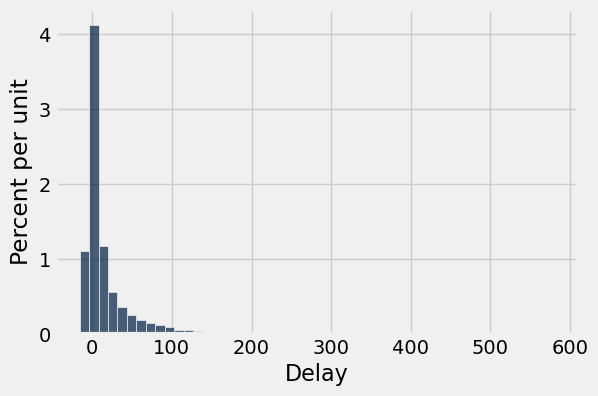

In [43]:
united.hist('Delay', bins = 50)
# lots of the flights are exactly on time
# most of the flights look like they are no more than 2 hours late

There appears to be some very delayed flights!

In [46]:
united.sort('Delay', descending=True)
#580/60
# flight 1964 to seattle was almost 10 hours late! 

# these flights are outliers
# meaning they are very late/delayed but they are not in the majority

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580
3154,6/22/15,300,HNL,537
3069,6/21/15,1149,IAD,508
2888,6/20/15,353,ORD,505
12627,8/23/15,1589,ORD,458
7949,7/23/15,1960,LAX,438
3412,6/23/15,1606,ORD,430
578,6/4/15,1743,LAX,408
2474,6/17/15,1122,HNL,405
8426,7/27/15,572,ORD,385


Let's truncate the extreme flights with a histogram from -20 to 201. (More on why we do this later.)

In [47]:
np.arange(-20, 201, 5)
# (-20, -15, -10, ... , 190, 195, 200)

array([-20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,
        45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105,
       110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,
       175, 180, 185, 190, 195, 200])

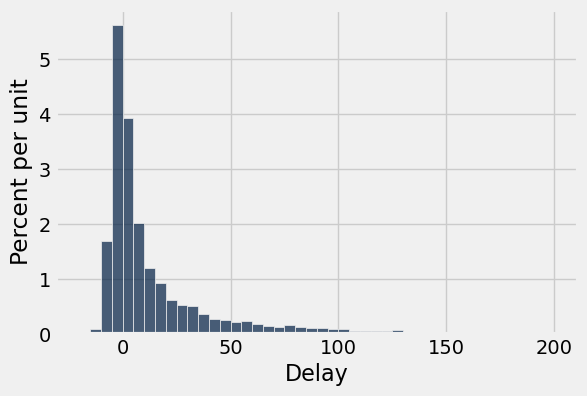

In [27]:
united_bins = np.arange(-20, 201, 5) # let's look at the majority of our flights
# which have flight delays between -20 min and 200 min
united.hist('Delay', bins=united_bins)
# Now that we have removed our outliers (flights that were more than 2.5 hours late)
# we can see the shape and center of our distirubiton a little more clearly
# majority of our flights are under an hour late
# some flights are early! (negative values in delay)

# this is our population distribution

What happens if we take a small sample from this population of flights and compute the distribution of delays:

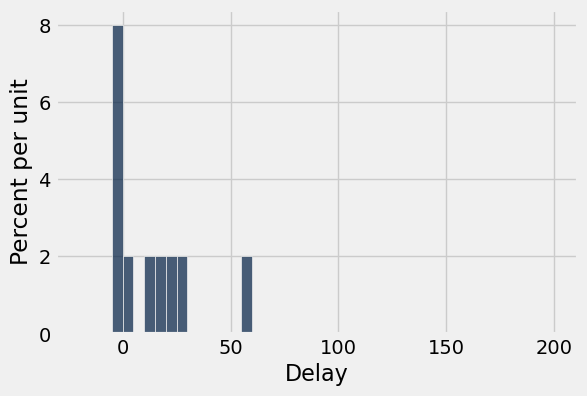

In [48]:
united.sample(10).hist('Delay', bins=united_bins)

If we increase the sample size

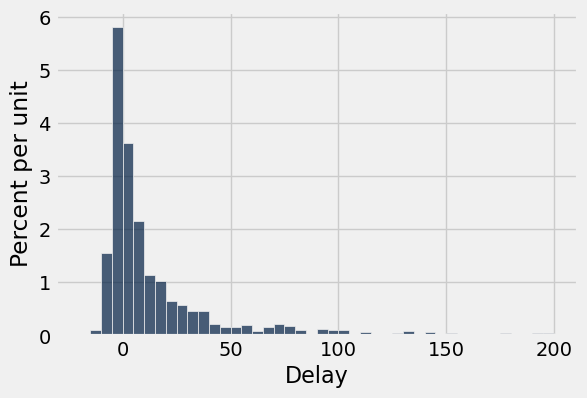

In [29]:
united.sample(1000).hist('Delay', bins=united_bins)
# with a sample size of 1_000, our empirical distirubtion (one that describes our sample vs our population)
# we get a distribution that looks very similar to our population distribution

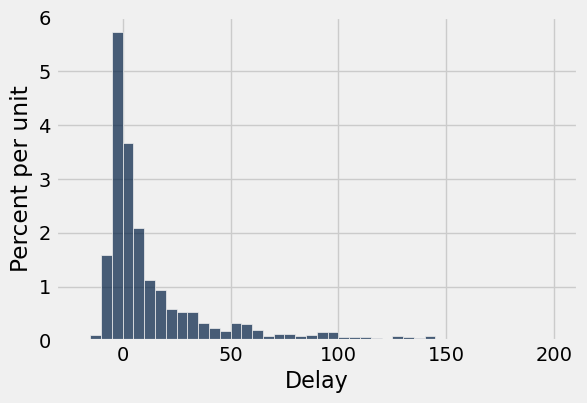

In [30]:
united.sample(2000).hist('Delay', bins=united_bins)

---
<center> Return to Slides </center>

---

## Simulating Statistics ##

Because we have access to the population (this is rare!) we can compute the parameters directly from the data.  For example, supposed we wanted to know the median flight delay:


In [31]:
np.median(united.column('Delay'))
# median flight delay is 2 minutes
# this is our population median
# this number describes the "true" median flight delay value for all united flights in the summer 2015

2.0

In practice, we will often have a sample.  The median of the sample is a statistic that estimates the median of the population.

In [32]:
np.median(united.sample(10).column('Delay'))
# sample median flight delay is 7 minutes

# our hope is that our sample statistic (sample median) is a good estimate of the population median
# we are simulating a statistic here, in hopes that this sample statistic can estimate the population statistic or "true" statistic
# when we are referring to measurements or statistics of the population
# it is convention to refer to it as a population parameter

# our sample statistics we hope are good estimates of a population parameter

7.0

In [49]:
np.median(united.sample(100).column('Delay'))


5.0

In [50]:
np.median(united.sample(1_000).column('Delay'))


2.0

In [51]:
np.median(united.sample(10_000).column('Delay'))


2.0

But is it a good estimate?  

It depends on the sample size (and how close we want it to be).  Here we define a function to simulate the process of computing the median from a random sample of a given size:

In [52]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))
    # step 1: generate a sample of size (size)
    # step 2: find the median flight delay in that sample

In [53]:
sample_median(10)

5.0

In [55]:
sample_median(1_000)
sample_median(10_000)

2.0

We can then simulate this sampling process many times:

In [57]:
np.arange(1000)
# (0, 1, ... 9_999)
# there are 10_000 elements inside

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [63]:
sample_medians = make_array() # initialize an empty array 
sample_medians
new_median = sample_median(10)
new_median
sample_medians = np.append(sample_medians, new_median) # now sample_medians will add on one element
sample_medians

array([ 5.5])

In [69]:
new_median = sample_median(10)
new_median
sample_medians = np.append(sample_medians, new_median) # now sample_medians will add on one element
sample_medians

array([ 5.5, -2.5,  7.5,  7. , -0.5])

In [70]:
# let's see the variation in sample medians from a sample size of 10
# we'll generate 1_000 samples, each with a size of 10
# and measure the sample median flight delay
# compare all 1_000 of them
# and generate a histogram to see the variation
sample_medians = make_array() # initialize an empty array 
# so that we can capture stuff inside our for loop
# each time we append new_median to our sample_medians array,
# sample medians array grows by one value

for i in np.arange(1000): # this for loop will run 1_000 times
    # i traverses through the array (0, 1, ... 9_999)
    # first time we enter the for loop i = 0, second time i = 1
    # until i = 9_999, python will execute the lines 13-14 and then exit out of the for loop
    # i here acts only as a counter, for how many times i should run the indented code below
    new_median = sample_median(10) # each time this runs, we generate a sample of size 10
    sample_medians = np.append(sample_medians, new_median) 
    # grabs the new_median value (e.g., 5 and appends it to our sample_medians array)

In [71]:
len(sample_medians)

1000

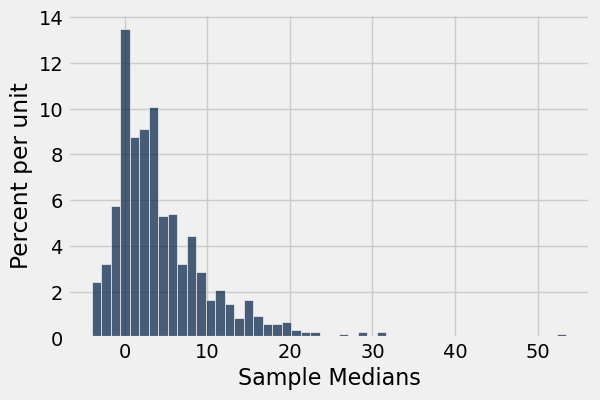

In [72]:
medians = Table().with_columns(
    "Sample Medians", sample_medians,
    "Sample Size", 10)
medians.hist("Sample Medians", bins = 50)
# below is a collection of 10_000 sample median flight delays
# this distribution usually is normally distirbuted (bell-shaped)
# and can look different from our probability distribution

# seeing the variation in sample medians
# majority of our sample median flight delays are under 20 minutes late

In [73]:
sample_medians2 = make_array()

for i in np.arange(1_000):
    new_median = sample_median(1_000) # only thing that changes it the sample size
    sample_medians2 = np.append(sample_medians2, new_median)

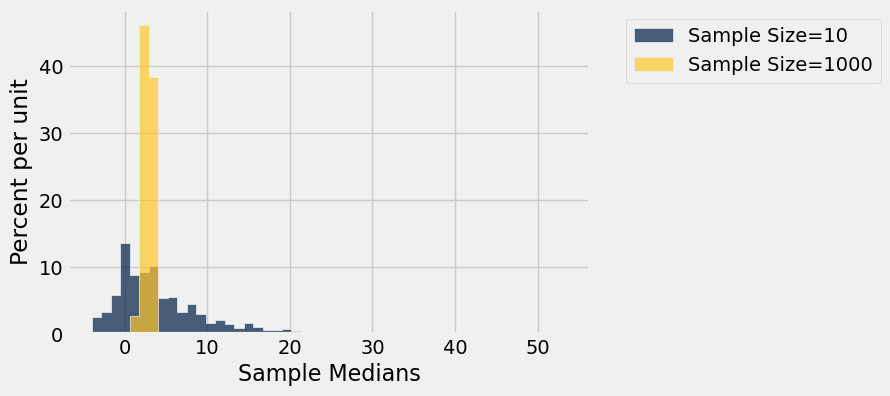

In [74]:
medians.append(Table().with_columns(
    "Sample Medians", sample_medians2,
    "Sample Size", 1000)).hist("Sample Medians", group="Sample Size", bins=50)

# in blue is our samples of size 10
# in gold is our samples of size 1_000
# below for both histograms (blue and gold), is a collectin of 1_000 sample median flight delays

In [75]:
np.median(united.column('Delay'))
# this is our population parameter
# the "true" median flight delay is 2 min

# both of these histograms capture the "true" median flight delay of 2 min
# with the larger sample size of 1_000, capturing the "true" median flight delay tons and tons of times
# what does this mean?
# the estimations of the pop parameter got more accurate with a larger sample size!


2.0

In [ ]:
# the histogram above are two attempts to "estimate" the population parameter